<a href="https://colab.research.google.com/github/EvgenyMyzin/C-Users-Gene-Desktop-GeekBrains-LocalRepository/blob/main/Copy_of_Unsupervised_learning_Lsn_8_Gr_ai_1054_Myzin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тема “Обучение без учителя”

In [ ]:
### Задание 1
### Импортируйте библиотеки pandas, numpy и matplotlib.
### Загрузите "Boston House Prices dataset" из встроенных наборов
### данных библиотеки sklearn.
### Создайте датафреймы X и y из этих данных.
### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
### с помощью функции train_test_split так, чтобы размер тестовой выборки
### составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
### Масштабируйте данные с помощью StandardScaler.
### Постройте модель TSNE на тренировочный данных с параметрами:
### n_components=2, learning_rate=250, random_state=42.
### Постройте диаграмму рассеяния на этих данных.

In [12]:
import numpy as np
import pandas as pd 
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
### с помощью функции train_test_split так, чтобы размер тестовой выборки
### составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [14]:
### Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [15]:
from sklearn.manifold import TSNE

In [6]:
### Постройте модель TSNE на тренировочный данных с параметрами:
### n_components=2, learning_rate=250, random_state=42.
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


In [11]:
### X_train_tsne

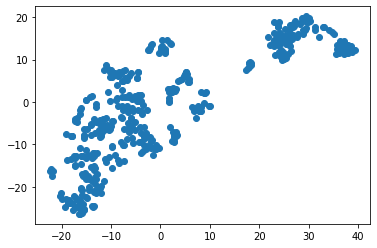

In [16]:
### Постройте диаграмму рассеяния на этих данных.
from matplotlib import pyplot as plt
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [ ]:
### Задание 2
### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
### используйте все признаки из датафрейма X_train.
### Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
### и раскрасьте точки из разных кластеров разными цветами.
### Вычислите средние значения price и CRIM в разных кластерах.

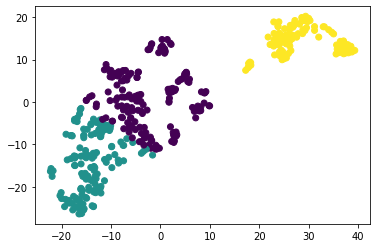

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_tsne)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

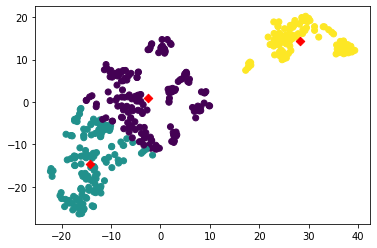

In [ ]:
centers = kmeans.cluster_centers_
### plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

In [ ]:
centers

array([[ -2.4593148,   0.9745943],
       [-14.228863 , -14.676764 ],
       [ 28.285488 ,  14.416898 ]], dtype=float32)